In [49]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.firefox.options import Options
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import re
import time

In [45]:
def scroll(driver, timeout, loops):
    scroll_pause_time = timeout

    last_height = driver.execute_script("return document.body.scrollHeight")
    num = 0
    
    while True and num < loops:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        num = num + 1
        time.sleep(scroll_pause_time)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

In [81]:
url = 'https://www.vivino.com/explore?e=eJwdijsOgCAQBW_zaqDfzo4jGGPWFQmJgAH83V5iM1PMxEIaMSRSiPyQ0UpBXhospMPi6NlvdHEJrvGOvFDhFpKvs-QzNWRaXRXcbZz6-st8itQcHw%3D%3D'
product_names = []
profile = webdriver.FirefoxProfile()
profile.set_preference("general.useragent.override", "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0")
options = Options()
options.headless = True
browser = webdriver.Firefox(options=options)
options.add_argument("start-maximized")
options.add_argument('disable-infobars')
browser.get(url)

loops = 100
timeout = 5
scroll(browser, timeout, loops)

titles = browser.find_elements_by_class_name('vintageTitle__wine--U7t9G')
prices = browser.find_elements_by_xpath("(//*[contains(@class, 'addToCartButton__price')])")
ratings = browser.find_elements_by_class_name('vivinoRating__averageValue--3Navj')
countries = browser.find_elements_by_xpath('//a[contains(@href, "/explore?country_code")]')

for title, price, rating, country in zip(titles, prices, ratings, countries):
    with open('vinDataLarge.csv', 'a', encoding='UTF8') as f:
        writer = csv.writer(f)
        date = 9999
        line = re.findall(r'\d+', title.text)
        
        if(len(line)>0):
            for l in line:
                if(len(str(l)) == 4):
                    date = l
                    
        data = [title.text, date, price.text.split("\n", 1)[0], rating.text, country.text]
        writer.writerow(data)
                                

In [84]:
df = pd.read_csv('vinData.csv')
df.head()

,Name,Year,Price,Rating,Country
0,Edizione Cinque Autoctoni,9999,149.00,4.3,Italy
1,Malbec 2018,2018,59.95,3.8,Argentina
2,Malbec 2016,2016,129.95,4.1,Argentina
3,Malbec 2013,2013,99.95,3.9,Argentina
4,Red Blend 2017,2017,549.00,4.3,United States


In [93]:
yearMask = df['Year'] < 2022
dfClean = df[yearMask]
dfClean.head()

,Name,Year,Price,Rating,Country
1,Malbec 2018,2018,59.95,3.8,Argentina
2,Malbec 2016,2016,129.95,4.1,Argentina
3,Malbec 2013,2013,99.95,3.9,Argentina
4,Red Blend 2017,2017,549.00,4.3,United States
5,Ripassa Valpolicella Ripasso Superiore 2016,2016,169.00,4.1,Italy




## SAMMENHÆNG I DATAENS COLUMNS
Vi ville undersøge om der er en correlation mellem f.eks. år og pris, pris og rating, og så videre.

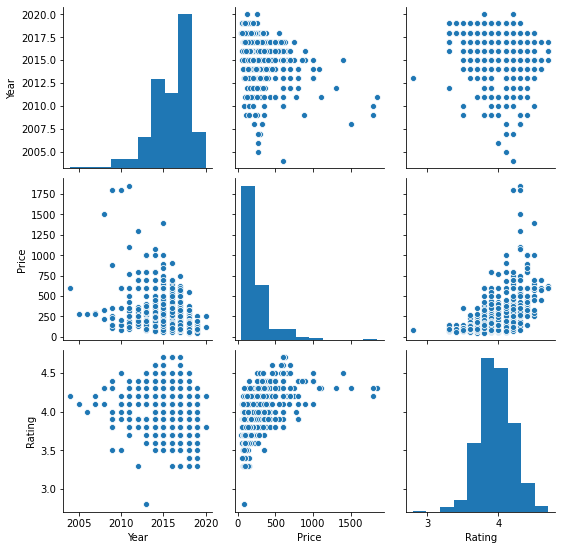

In [92]:
import seaborn as sb

sb.pairplot(dfClean)

In [94]:
dfClean.corr()

,Year,Price,Rating
Year,1.000000,-0.424948,-0.206095
Price,-0.424948,1.000000,0.539901
Rating,-0.206095,0.539901,1.000000


In [97]:
dfLarge = pd.read_csv('vinDataLarge.csv')
yearMask = dfLarge['Year'] < 2022
dfLargeClean = dfLarge[yearMask]

dfLargeClean.corr()

,Year,Price,Rating
Year,1.000000,-0.486648,-0.278772
Price,-0.486648,1.000000,0.597095
Rating,-0.278772,0.597095,1.000000


0.5399014967304491


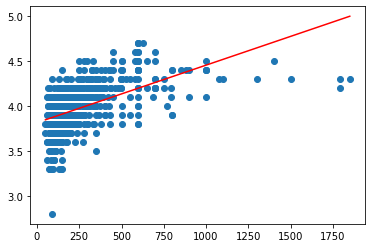

In [110]:
x = dfCleanLarge['Price']
y = dfCleanLarge['Rating']
plt.scatter(x, y)

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
correlation = x.corr(y)
print(correlation)

0.5970954630350238


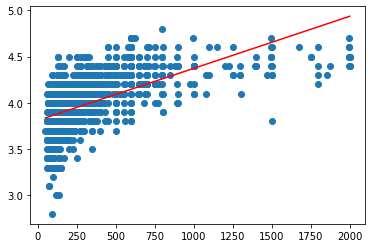

In [118]:
x = dfLargeClean['Price']
y = dfLargeClean['Rating']
plt.scatter(x, y)

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
correlation = x.corr(y)
print(correlation)

-0.20609518973174962


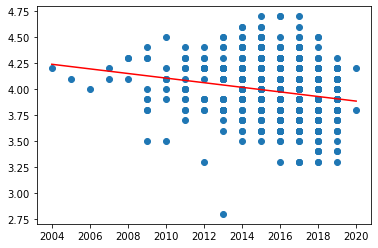

In [114]:
x = dfClean['Year']
y = dfClean['Rating']
plt.scatter(x, y)

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
correlation = x.corr(y)
print(correlation)

-0.2787722380214421


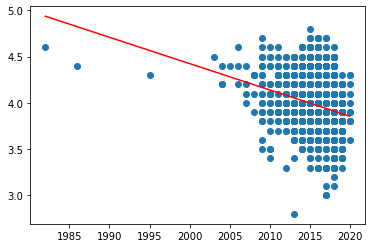

In [115]:
x = dfLargeClean['Year']
y = dfLargeClean['Rating']
plt.scatter(x, y)

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
correlation = x.corr(y)
print(correlation)